In [ ]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import pandas as pd
import numpy as np

path = '/content/milk_production_dataset.csv'
data = pd.read_csv(path)

print(data.shape)
data.head()



(170, 2)


,Month,Monthly milk production
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [ ]:
data.dropna(axis = 0 ,inplace=True)  # Remove rows with NaN values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    168 non-null    object 
 1   Monthly milk production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
# convert the month column from text to datatime

data['Month'] = pd.to_datetime(data['Month'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    168 non-null    datetime64[ns]
 1   Monthly milk production  168 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.9 KB


<Axes: >

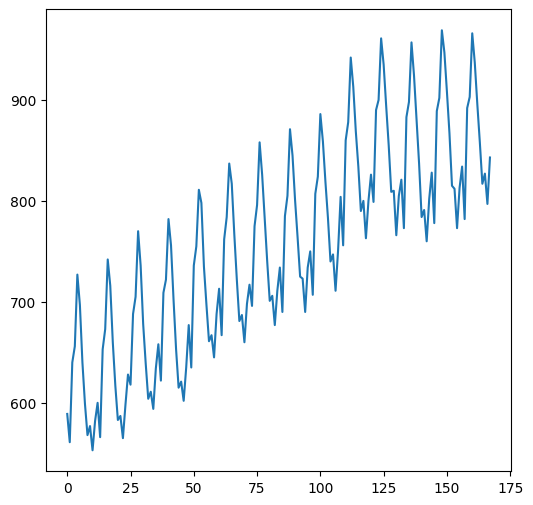

In [ ]:
import matplotlib.pyplot as plt
# visualise the data
data['Monthly milk production'].plot(figsize=(6,6))

In [ ]:
# set the month column as the index of the pandas dataframe

data.set_index('Month',inplace=True)

data.head()

,Monthly milk production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [ ]:
tempData = data['Monthly milk production']
tempData.head()

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
Name: Monthly milk production, dtype: float64

In [9]:
# lets create the forecaster

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()


# forecaste the value
value_for= sarima_model.forecast()
print(value_for)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1976-01-01    865.174112
Freq: MS, dtype: float64
